## Task-3:To Explore Unsupervised Machine Learning
### Dataset : iris
### Algorithm : KMeans

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Read csv file with pandas

In [42]:
df = pd.read_csv('Iris.csv',  names = ['id','sepal length', 'sepal width', 'petal length', 'petal width','type'],skiprows=1)
label = {key:ind for ind,key in enumerate(df['type'].unique().tolist())}
df['label'] = df['type'].apply(lambda x:label[x])
df

,id,sepal length,sepal width,petal length,petal width,type,label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


### Reduce 4 dimensions to 2 dimensions using PCA

In [4]:
X = df.iloc[:,1:5].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf = pd.concat([principalDf,df['type']],axis=1)
principalDf

,PC1,PC2,type
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


### Visualize clusters

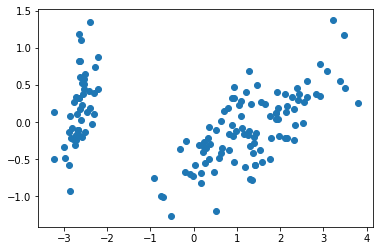

In [5]:
x1 = principalDf['PC1'].values
x2 = principalDf['PC2'].values
m = len(x1)
plt.scatter(x1,x2)

### Elbow method to determine n_cluster value

Text(0, 0.5, 'inertia')

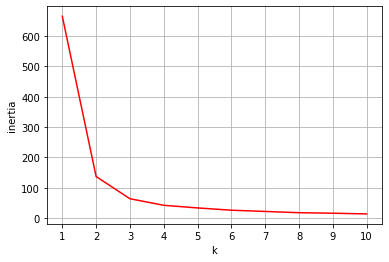

In [6]:
fig = plt.figure()
X_pca = principalDf.iloc[:,0:2].values
inertias = []
for k in range(1,11):
    km = KMeans(n_clusters=k).fit(X_pca)
    inertias.append(km.inertia_)
plt.plot(range(1,11),inertias,'r-',label='inertia')
plt.xticks(ticks=range(1,11))
plt.grid()
plt.xlabel("k")
plt.ylabel("inertia")

### KMeans using 3 n_clusters 

In [23]:
kmeans = KMeans(n_clusters=3,n_init=15).fit(X_pca)
y_pred = kmeans.predict(X_pca)

### Comparison between Predicted and Actual

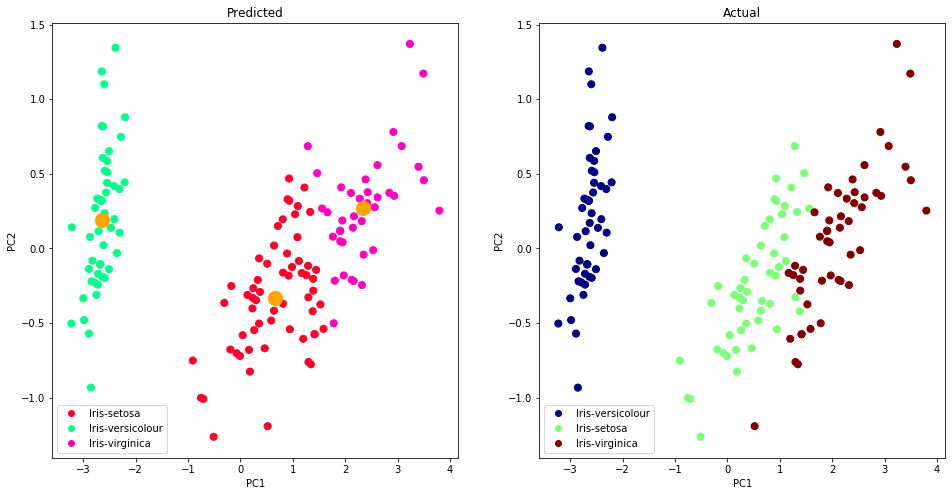

In [53]:
newLabels = kmeans.labels_
fig,axes = plt.subplots(1,2,figsize=(16,8))
s1 = axes[0].scatter(X_pca[:,0],X_pca[:,1],c=newLabels,s=50,cmap='gist_rainbow',label = [1,2,3])
s2 = axes[1].scatter(X_pca[:,0],X_pca[:,1],c=y,s=50,cmap='jet')
axes[0].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='orange',s=200)

axes[0].set_title("Predicted")
axes[1].set_title("Actual")

axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

axes[0].legend()

text_labels1 = ['Iris-setosa', 'Iris-versicolour', "Iris-virginica"]
text_labels2 = ['Iris-versicolour','Iris-setosa',"Iris-virginica"]
#s = plt.scatter(x, y, c=labels, cmap='jet', vmin=0, vmax=4)
axes[0].legend(s1.legend_elements()[0], text_labels1)
axes[1].legend(s2.legend_elements()[0], text_labels2)
#axes[0].legend()

In [54]:
# plt.figure(figsize=(8,6))
# for i in range(3):
#     x1, x2 = X_pca[y_pred==i,0],X_pca[y_pred==i,1]
#     plt.scatter(x1,x2,label="Cluster:"+str(i+1))
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=200,label='centroids')
# #plt.scatter(X_pca[y != y_pred,0],X_pca[y != y_pred,1],label="Wrong",c='y')
# plt.xlabel("PC1")
# plt.ylabel('PC2')
# plt.legend()